In [1]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy wordcloud 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 

In [2]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 58 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubu

In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import re
from bs4 import BeautifulSoup
import warnings
import numpy as np
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
df = pd.read_excel('/쿠팡이츠_리뷰.xlsx')
df.head(3)  

,별점,리뷰 공감 순,키워드,리뷰
0,1,69,포장 주문 옵션의 어려움,포장 옵션으로 들어가서 주문하는데도 왜 계속 주소 설정 요청 -> 배달로 전환되나요...
1,1,53,지역에 따른 쿠폰,첫 할인을 파격적으로 해준다고 여기저기 광고하고 다니며 현혹해서 다운받고 가입하면 ...
2,1,240,지역에 따른 쿠폰,쿠폰이 계속해서 사용되지가 않길래 고객센터에 문의해봤더니 서울만 사용가능한 쿠폰이래...


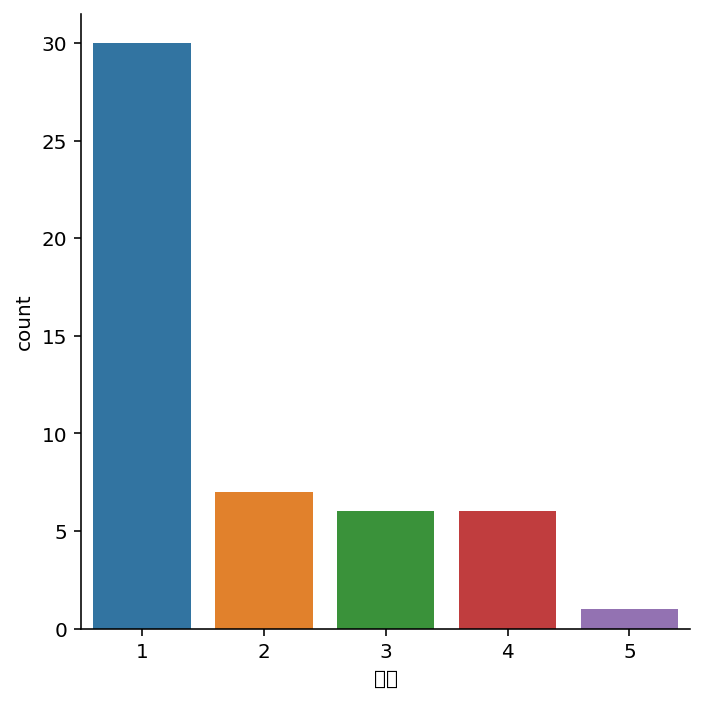

In [7]:
sns.factorplot('별점',kind='count',data=df)

In [8]:
df['별점'].value_counts()

1    30
2     7
4     6
3     6
5     1
Name: 별점, dtype: int64

In [9]:
high_rate_review = df[df['별점'] >= 3]['리뷰']
low_rate_review = df[df['별점'] <= 2]['리뷰']

In [10]:
len(high_rate_review)

13

In [11]:
len(low_rate_review)

37

In [12]:
high_rate_review = high_rate_review.apply(lambda x:re.sub('[^가-힣\s\d]',"",x))
low_rate_review = low_rate_review.apply(lambda x:re.sub('[^가-힣\s\d]',"",x))

In [13]:
high_rate_review[:10]

4     내가 주문한 음식이 어디에서 오는지 실시간으로 오는건 좋아요 근데 제가 음식을 주문...
5     내가 주문한 음식이 어디에서 오는지 실시간으로 오는건 좋아요 근데 제가 음식을 주문...
6     진짜 배달앱중 최고에요 참고로 지역은 서울 송파구 입니다 결제가 되자마자 매장에서 ...
7     음식 주문부터 배달완료 과정까지 모두 앱에서 확인할수 있어 너무 편리합니다 요 배 ...
8     쿠팡이츠 아주 잘쓰고있습니다 솔직히 디자인적으로는 배민앱이 더 귀엽고 사용자가 원하...
10    편리하고 좋은 앱이지만 배달이 잘못되었을때 고객센터로 연락을 하는게 아닌 배달 파트...
13    전에 주소 헷갈리셔서 배달원 분이 엄한 집앞에 음식 두고 오신 적이 있어요 이날 결...
20    이용은 잘 하고 있습니다만무료배달 이라는 문구는 수정이 필요하겠네요 조건부 무료라던...
22    다 좋은데 배달비 낚시는 좀 개선했으면 합니다 무료배달이래서 들어갔더니 7만원 이상...
35                   배달도 빠르고 다좋은데요 만나서 결제하기가 있었으면 좋겠어요 
Name: 리뷰, dtype: object

In [14]:
low_rate_review[:10]

0     포장 옵션으로 들어가서 주문하는데도 왜 계속 주소 설정 요청  배달로 전환되나요 심...
1     첫 할인을 파격적으로 해준다고 여기저기 광고하고 다니며 현혹해서 다운받고 가입하면 ...
2     쿠폰이 계속해서 사용되지가 않길래 고객센터에 문의해봤더니 서울만 사용가능한 쿠폰이래...
3     음식점 메뉴 등으로 검색하면 가까운순 주문많은순 별점높은순 등 뭘 선택해도 추천매장...
9     장점 1 배송이 빠르고 가 누구나 알아보기 쉽게 되어있습니다 단점 1 다른 플랫폼과...
11    배달하는 분과 연락을 바로 할 수 있도록 조치해주시면 안되나요  매번 여러 배달원들...
12    와 진짜 너무 짜증나요 기사한테 다이렉트로 연락을 못하면 고객센터라도 전화 빨리 받...
14    직선거리로만 계산을 하니 실제 운행거리가 40분 걸리는 곳임에도 계속 배달해달라고 ...
15    얼마전 업데이트 된 배송비표시기능 음식점 정보가 노출되어있는 상태에서 배송비정보가 ...
16    별 한개도 아깝습니다 왜냐면 무료배달이 아닌데도 무료배달로 해놔서 소비자들을 기만하...
Name: 리뷰, dtype: object

In [15]:
low_tagger = Twitter()
high_tagger = Twitter()

In [16]:
def get_word_low_rating(sentence):
    nouns = low_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

def get_word_high_rating(sentence):
    nouns = high_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

In [17]:
low_countvector = CountVectorizer(tokenizer=get_word_low_rating, max_features=300)
low_tdf = low_countvector.fit_transform(low_rate_review)
low_words = low_countvector.get_feature_names()

In [18]:
low_words[:5]

['가게', '가격', '가구', '가기', '가능']

In [19]:
count_mat = low_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
low_rating_word_count = list(zip(low_words, count))
low_rating_word_count = sorted(low_rating_word_count, key=lambda t:t[1], reverse=True)

In [20]:
low_rating_word_count[:15]

[('배달', 75),
 ('무료', 50),
 ('주문', 31),
 ('취소', 24),
 ('결제', 23),
 ('쿠팡', 16),
 ('쿠폰', 13),
 ('고객', 12),
 ('사용', 12),
 ('그냥', 11),
 ('생각', 11),
 ('음식', 10),
 ('이상', 10),
 ('검색', 9),
 ('리뷰', 9)]

In [21]:
high_countvector = CountVectorizer(tokenizer=get_word_high_rating, max_features=300)
high_tdf = high_countvector.fit_transform(high_rate_review)
high_words = high_countvector.get_feature_names()

count_mat = high_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
high_rating_word_count = list(zip(high_words, count))
high_rating_word_count = sorted(high_rating_word_count, key=lambda t:t[1], reverse=True)

In [22]:
high_rating_word_count[:15]

[('배달', 22),
 ('음식', 10),
 ('무료', 9),
 ('주문', 9),
 ('결제', 7),
 ('쿠팡', 7),
 ('추가', 6),
 ('이용', 5),
 ('고객', 4),
 ('바로', 4),
 ('배송비', 4),
 ('센터', 4),
 ('연락', 4),
 ('개선', 3),
 ('결재', 3)]

In [23]:
low_rating_document = low_rate_review.values
high_rating_document = high_rate_review.values

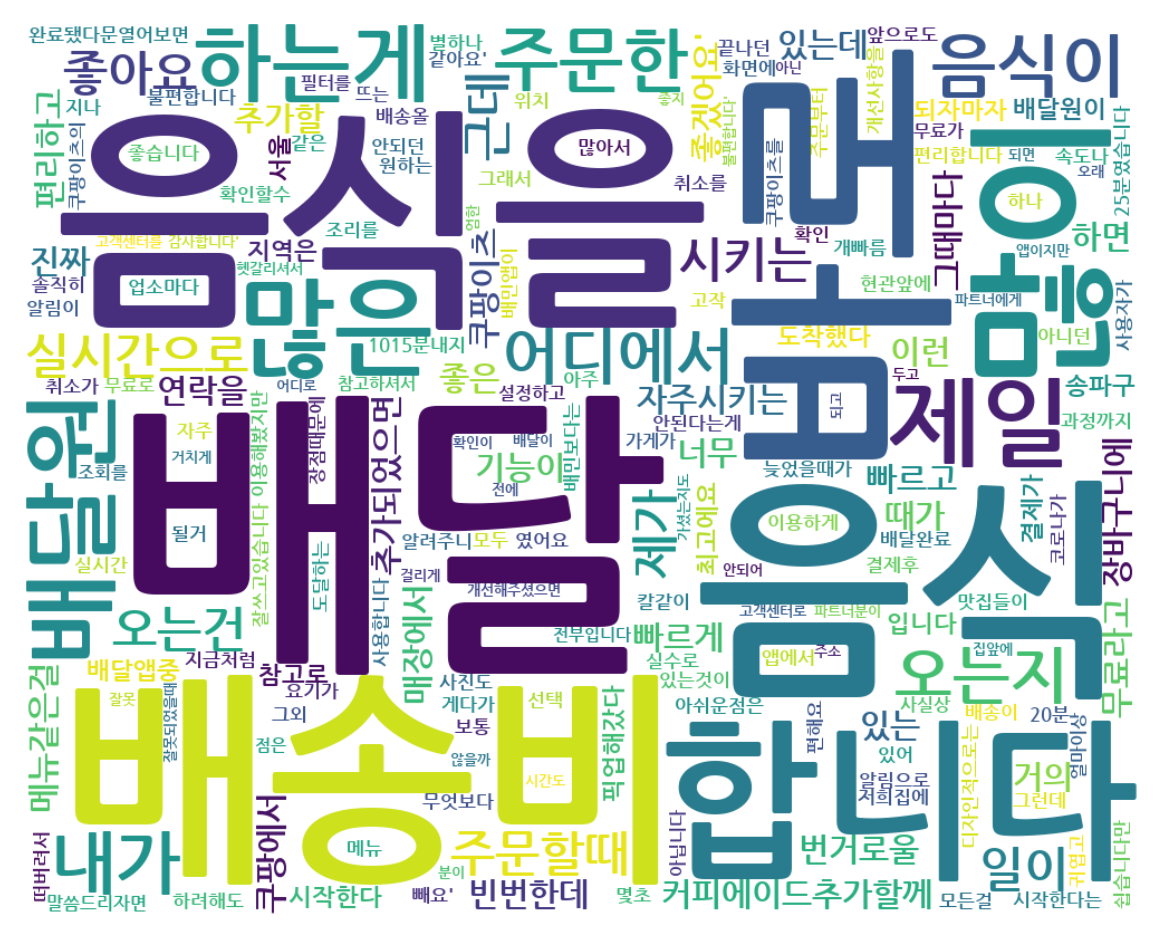

In [24]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(high_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

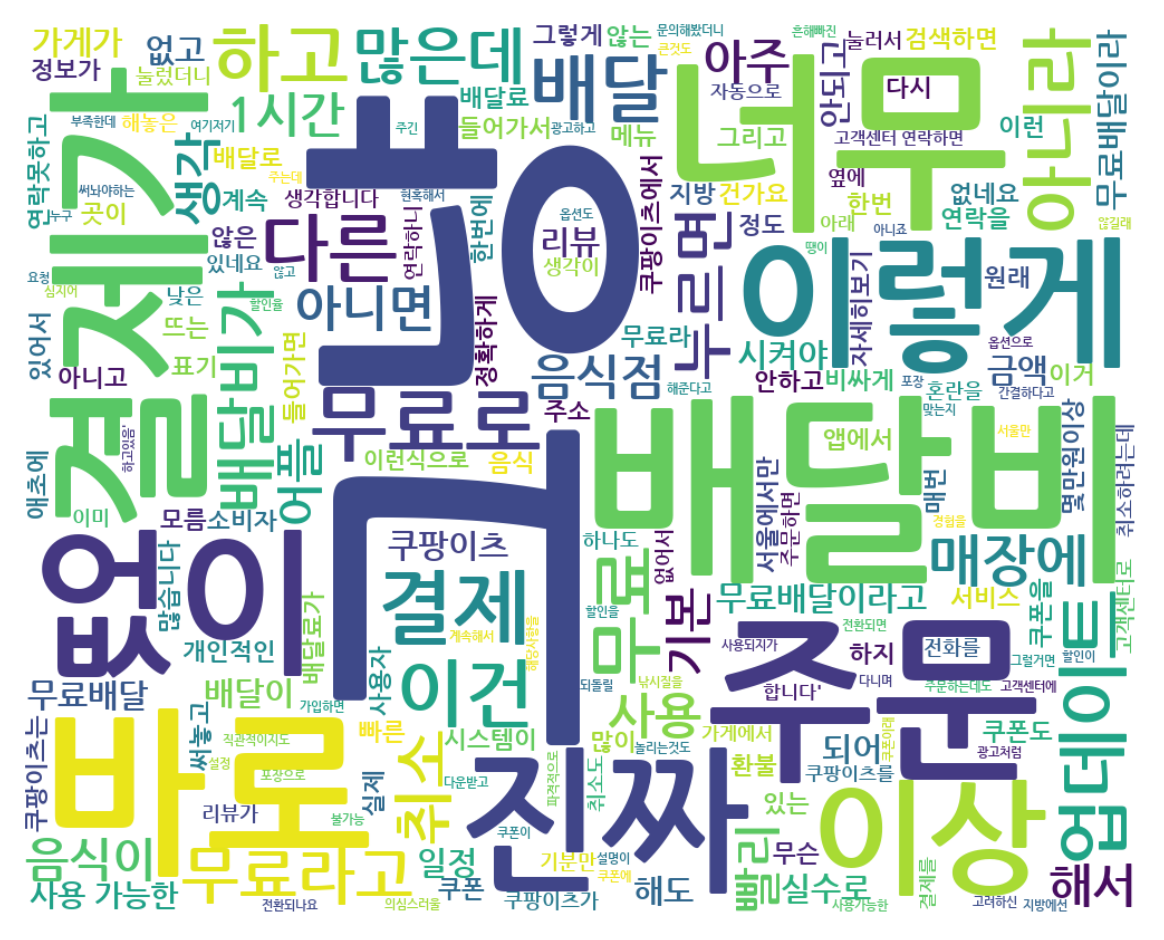

In [25]:
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(low_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()